<h2>Lab 6</h2>

<h4>Mehak Sharma | BioE 131 | Fall 2019</h4>

In [10]:
import subprocess
import numpy as np
import sqlite3
import pandas as pd

<h3>Align the reads to the human genome</h3>



<b>What percentage of your sequencing library came from contaminating human DNA?</b>
19.87% of the reads aligned to the human genome so 19.87% of the sequencing library came from contaminating human DNA.

<h3>Align the reads to the S. oneidensis reference genome</h3>


<b>What percentage of your filtered library didn’t align to the reference genome?</b>

26.02% of the reads aligned 0 times

<b>If you use --very-sensitive instead of --very-fast, does this percentage increase or decrease?</b>

Using --very-sensitive and --very-fast outputs a slightly higher percentage -- 74.13% instead of 73.98%. See below!


<h3>Generate a coverage plot</h3>

Instructions: At this point, you should have a SAM file containing the alignment of your filtered reads to the S. oneidensis reference genome. Referring to the PowerPoint, please convert this file to BAM,sort it, index it, and use “depth” to generate a file containing the depth of coverage for everyposition in the reference genome.What is the min, max, and mean coverage across all positions?Once you have your depth file, load it into iPython and use matplotlib to generate a scatter plot where the x-axis is position in the genome and the y-axis is depth of coverage. Next, using the same data, generate a coverage histogram. We want to see what the distribution of coverage depth looks like. 

-> Convert SAM to BAM, sort BAM file by coordinates, generate an index by alignment coordinates, and create .tab file with coordinates and the number of times a read is aligned to each coordinate.

<b>Commands for Conversion:</b>

samtools view -b output2.sam > output2.bam

samtools sort output2.bam > output2.sorted.bam

samtools index output2.sorted.bam

samtools depth output2.sorted.bam > depths.tab




In [11]:
depths = pd.read_csv('depths.tab', sep='\t', lineterminator='\n', header = None, names = ['Read', 'Position', 'Depth'])

In [12]:
print('Mean: ' + str(np.mean(depths['Depth'])))
print('Max: ' + str(max(depths['Depth'])))
print('Min: ' + str(min(depths['Depth'])))

Mean: 37.49999103545206
Max: 263
Min: 1


In [18]:
import matplotlib.pyplot as plt

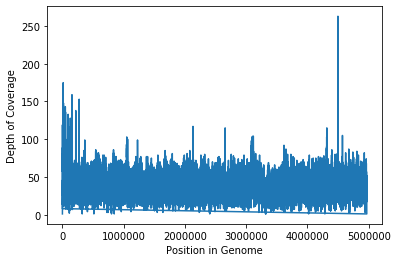

In [19]:
x = depths['Position']
y = depths['Depth']
plt.xlabel('Position in Genome') 
plt.ylabel('Depth of Coverage') 
plt.plot(x, y)
plt.show()

(array([  1497.,   7260.,  20237.,  34153.,  56068.,  93654., 148837.,
        234576., 332107., 421934., 497754., 539640., 544758., 505434.,
        430289., 344393., 261192., 194727., 134839.,  94702.,  64247.,
         39833.,  27035.,  18765.,  13207.,  11130.,   8619.,   6512.,
          5708.,   4898.,   3898.,   3647.,   3206.,   2803.,   2154.,
          2179.,   1938.,   1840.,   1872.,   1530.,   1132.,   1304.]),
 array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
         39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
         78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 114,
        117, 120, 123, 126]),
 <a list of 42 Patch objects>)

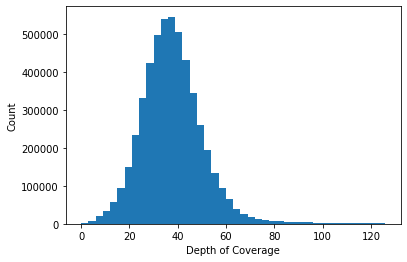

In [32]:
plt.xlabel('Depth of Coverage')
plt.ylabel('Count')
plt.hist(y, bins=[i for i in range(129) if i % 3 == 0], range = 100)

Extra Credit 1: Generate the same two plots using the SAM file you produced aligning the reads to the human reference genome. Instead of using “Position in Genome” (the plot on the left in red, above), plot the average depth (total depth / length of chromosome) for each human chromosome: chr1-22, X, and Y. What biological sex is Jamie? 

Extra Credit 2: Try to “zoom in” on regions that seem to have higher coverage than average. Can you figure out what genes are in those regions? You’ll have to extract the sequence from those regions and BLAST it. 

In [ ]:
data = pd.read_csv('depths.tab', names=['y','x'])

plt.title("Higher Cverage than Avg Region 1")

plt.ylabel('Depth of Coverage')
plt.xlabel('Postion in Genome')
plt.xlim(3.698e6, 3.701e6)
plt.scatter(x = data['x'], y = data['y'], s = 1, color = 'blue')
plt.show()